<a href="https://colab.research.google.com/github/JuanMartinez04/Digital_signal_processing_JDMS/blob/main/PDS_20_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FFT de una señal, reconstrucción a partir del espectro usando la IFFT, filtro pasa banda en frecuencia.


Hecho por Juan David Martínez Sánchez

In [ ]:
#librerías
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
#definimos nuestra señal
frecs=[20,30,40,50,60,70,80,90,100]
fs=512
tf=1
t =np.linspace(0,tf,tf*fs)
signal=np.sin(2*np.pi*10*t)
#hacemos la combinación lineal de todas las frecuencias
for frec in frecs:
  s_i= np.sin(2*np.pi*frec*t)
  signal= signal+s_i

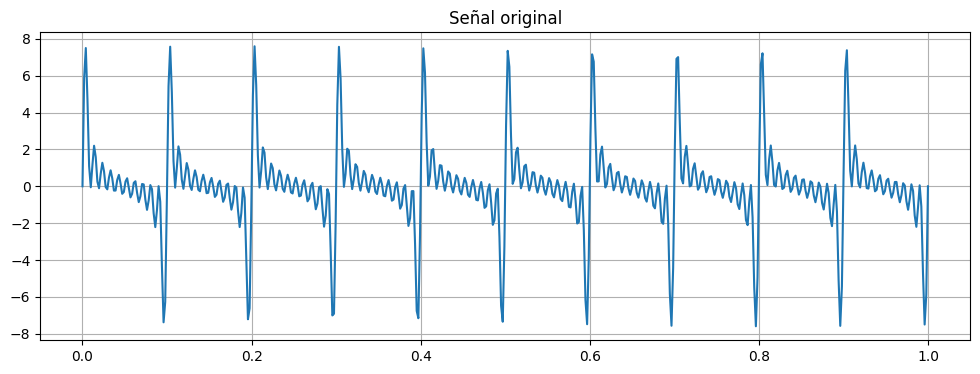

In [ ]:
#visualizamos la señal sin ruido
plt.figure(figsize =(12,4))
plt.title('Señal original')
plt.plot(t,signal)
plt.grid()

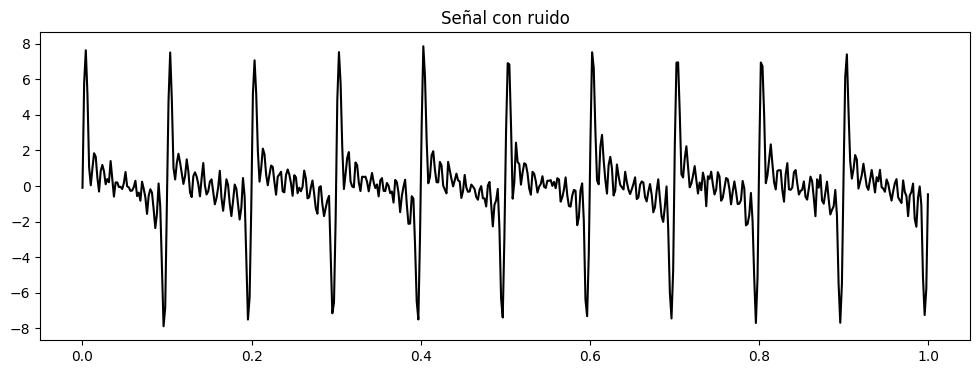

In [ ]:
#hacemos el ruido blanco gaussiano
rbg= np.random.normal(size=len(signal),scale=0.3)
signal_rbg=signal+rbg
#visualizamos
plt.figure(figsize =(12,4))
plt.title('Señal con ruido')
plt.plot(t,signal_rbg,'black')

In [ ]:
#calculamos la fft de la señal
fft_s= sc.fft.fft(signal)
frecs_fft = sc.fft.fftfreq(len(signal),1/fs)
#calculamos la fft de la señal con ruido
fft_s_rbg= sc.fft.fft(signal_rbg)
frecs_fft = sc.fft.fftfreq(len(signal),1/fs)

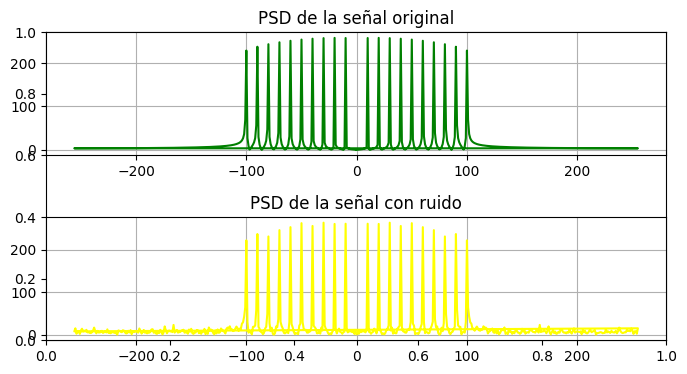

In [ ]:
#visualizamos el espectro de potencia
plt.figure(figsize =(8,4))
plt.title('PSD de la señal original')
plt.subplot(2,1,1)
plt.plot(frecs_fft,np.abs(fft_s),'green')
plt.grid()
plt.subplot(2,1,2)
plt.title('PSD de la señal con ruido')
plt.plot(frecs_fft,np.abs(fft_s_rbg),'yellow')
plt.grid()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [ ]:
#reconstruimos la señal
signal_R= sc.fft.ifft(fft_s)
#recinstruir la señal con ruido
signal_R_rbg= sc.fft.ifft(fft_s_rbg)

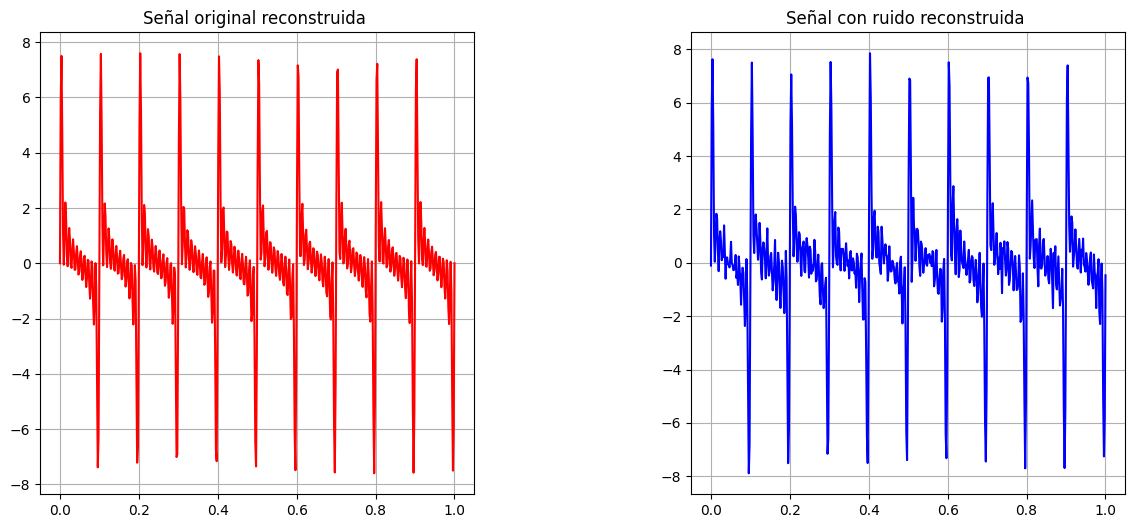

In [ ]:
#visualizamos la señal reconstruida
plt.figure(figsize =(14,6))
plt.subplot(1,2,1)
plt.title('Señal original reconstruida ')
plt.plot(t,signal_R,'red')
plt.grid()
plt.subplot(1,2,2)
plt.title('Señal con ruido reconstruida ')
plt.plot(t,signal_R_rbg,'blue')
plt.grid()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [ ]:
#definimos el filtro en el domino de la frecuencia
def filt(frecs,frec_0:0,frec_1):
  '''
  function for a bandpass filter

  params
  frecs: frequencies vector
  frec_0: lower frequency
  frec_1: cut frequency
  '''
  filt_v=np.zeros_like(frecs)
  filt_v[(frecs>=frec_0)&(frecs<=frec_1)]=1
  filt_v[(frecs<=-frec_0)&(frecs>=-frec_1)]=1
  return filt_v



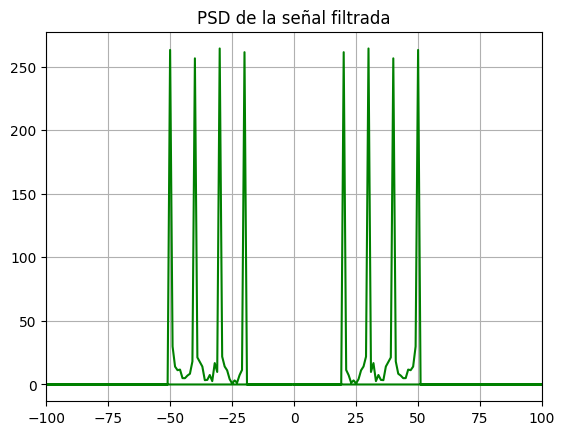

In [ ]:
#Aplicamos el filtro a la señal para dejar pasar la señal de 20 a 50hz
filtro=filt(frecs_fft,20,50)
fft_signal_filt= fft_s_rbg*filtro
plt.title('PSD de la señal filtrada')
plt.plot(frecs_fft,np.abs(fft_signal_filt),'green')
plt.xlim(-100,100)
plt.grid()

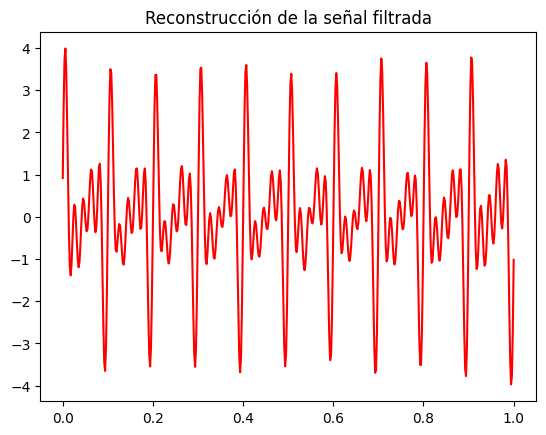

In [ ]:
#Reconstruimos la señal filtrada de tres componentes
signal_filt= sc.fft.ifft(fft_signal_filt)
#visualizamos la señal resultante
plt.title('Reconstrucción de la señal filtrada')
plt.plot(t,signal_filt,'red')

#Segunda parte trabajo clase 27/11:
#Ecualizador de 5 frecuencias, a partir del código del ecualizador de 1 frecuencia copiado de https://github.com/YeisonCardona/procesamiento-senales

In [2]:

!pip install dsp_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.7 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq

from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

In [ ]:
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

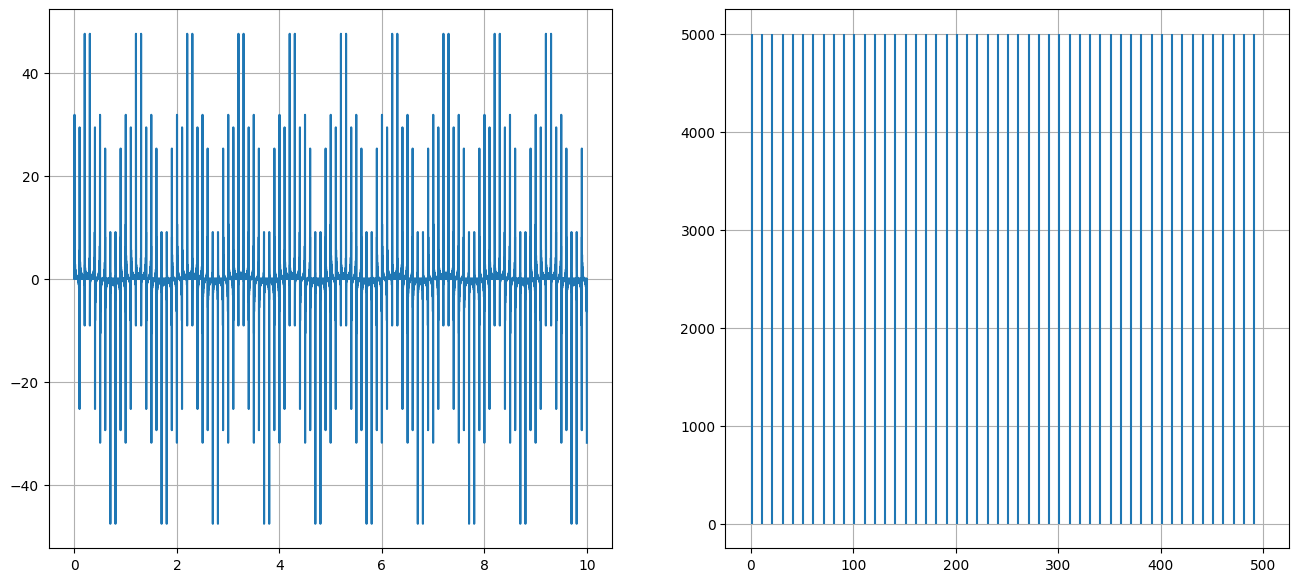

In [ ]:
vis = Visualizer(figsize=(16, 7), dpi=100)

f = np.arange(1, 500, 10)

generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

In [ ]:
@interact(fc=(0, 500, 10), wb=(10, 250, 10), gain=(-10, 10, 1))
def equalizer(fc=100, wb=10, gain=0):
    f0 = fc-wb
    f1 = fc+wb
    sample_rate = generador.sampling_rate

    if f0<=0:
        f0 = 0.1
    if f1>=sample_rate/2:
        f1 = sample_rate/2 - 0.1

    signal_filtered = filter_(signal, f0, f1, sample_rate)

    signal_equalized = (signal - signal_filtered) + (signal_filtered*np.power(10, (gain / 20)))

    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()

interactive(children=(IntSlider(value=100, description='fc', max=500, step=10), IntSlider(value=10, descriptio…

In [5]:
# Crear el interactivo para el ecualizador de 5 bandas
@interact(
    center_freq1=(20, 500, 10), bandwidth1=(10, 100, 10), gain1=(0, 100, 10),
    center_freq2=(20, 500, 10), bandwidth2=(10, 100, 10), gain2=(0, 100, 10),
    center_freq3=(20, 500, 10), bandwidth3=(10, 100, 10), gain3=(0, 100, 10),
    center_freq4=(20, 500, 10), bandwidth4=(10, 100, 10), gain4=(0, 100, 10),
    center_freq5=(20, 500, 10), bandwidth5=(10, 100, 10), gain5=(0, 100, 10),
)
# Definir la función para el ecualizador de 5 bandas
def equalizer_5_bands(center_freq1=50, bandwidth1=20, gain1=0,
                      center_freq2=150, bandwidth2=30, gain2=0,
                      center_freq3=250, bandwidth3=40, gain3=0,
                      center_freq4=350, bandwidth4=50, gain4=0,
                      center_freq5=450, bandwidth5=60, gain5=0):

    """
    Ecualizador gráfico de 5 bandas para ajustar la señal de entrada mediante
    controles de frecuencia central, ancho de banda y ganancia.

    Parámetros:
        center_freqX: Frecuencia central de la banda X (en Hz).
        bandwidthX: Ancho de banda de la banda X (en Hz).
        gainX: Ganancia aplicada a la banda X (en dB).
    """

    # Obtener la tasa de muestreo de la señal
    sample_rate = generador.sampling_rate

    # Definir la función para aplicar un filtro a una banda específica
    def apply_bandpass_filter(input_signal, center_freq, bandwidth, gain):
        """
        Aplica un filtro de paso banda a la señal de entrada y ajusta la ganancia.

        Parámetros:
            input_signal: La señal a filtrar.
            center_freq: Frecuencia central del filtro.
            bandwidth: Ancho de banda del filtro.
            gain: Ganancia en dB aplicada al filtro.

        Retorna:
            Señal filtrada ajustada con la ganancia.
        """
        f0 = max(0.1, center_freq - bandwidth)  # Límite inferior de la banda
        f1 = min(sample_rate / 2 - 0.1, center_freq + bandwidth)  # Límite superior de la banda
        filtered_signal = filter_(input_signal, f0, f1, sample_rate)
        return filtered_signal

    # Aplicar filtros de paso banda para cada una de las 5 bandas
    band_1 = apply_bandpass_filter(signal, center_freq1, bandwidth1, gain1)
    band_2 = apply_bandpass_filter(signal, center_freq2, bandwidth2, gain2)
    band_3 = apply_bandpass_filter(signal, center_freq3, bandwidth3, gain3)
    band_4 = apply_bandpass_filter(signal, center_freq4, bandwidth4, gain4)
    band_5 = apply_bandpass_filter(signal, center_freq5, bandwidth5, gain5)

    # Promediar las señales filtradas de las 5 bandas
    average_band_signal = (band_1 + band_2 + band_3 + band_4 + band_5) / 5

    # Promediar las ganancias de las 5 bandas
    average_gain = (gain1 + gain2 + gain3 + gain4 + gain5) / 5

    # Construir la señal ecualizada
    equalized_signal = (signal - average_band_signal) + \
                       (average_band_signal * np.power(10, (average_gain / 20)))

    # Graficar la señal ecualizada
    vis.plot_dsp(
        equalized_signal,
        sample_rate=sample_rate,
        time=generador.time,
        ffn='vlines',
        color='red'
    )
    plt.show()


interactive(children=(IntSlider(value=50, description='center_freq1', max=500, min=20, step=10), IntSlider(val…